# COMP90016 - Assignment 2
Version 1. Last edited 17/04/2023.


In [2]:
### Fill in your student details here
NAME = "Arya Araban"

ID = "1439683"

## Semester 1, 2023


This assignment should be completed by each student individually. Make sure you read this entire document, and ask for help if anything is not clear. Any changes or clarifications to this document will be announced via the LMS.

Please make sure you review the University's rules on academic honesty and plagiarism: https://academichonesty.unimelb.edu.au/

Do not copy any code from other students or from the internet. This is considered plagiarism.

Your completed notebook file containing all your answers will be turned in via LMS. Please also submit an HTML file.

To complete the assignment, finish the tasks in this notebook.

The tasks are a combination of utilising computational genomics tools, writing your own code, interpreting the results and answering related short-answer questions.

In some cases, we have provided test input and test output that you can use to try out your solutions. These tests are just samples and are **not** exhaustive - they may warn you if you've made a mistake, but they are not guaranteed to. It's up to you to decide whether your code is correct.

**Remember to save your work early and often.**

## Marking

Cells that must be completed to receive marks are clearly labelled. Some cells are code cells, in which you must complete the code to solve a problem. Others are markdown cells, in which you must write your answers to short-answer questions. 


### Completing code cells

Cells that must be completed to receive marks are labelled like this:

`# -- GRADED CELL (1 mark) - complete this cell --`

- You will see the following text in graded code cells:

``` python
# YOUR CODE HERE
raise NotImplementedError()
```

- ***You must remove the `raise NotImplementedError()` line from the cell, and replace it with your solution.***


- Only add answers to graded cells. If you want to import a library or use a helper function, this must be included in a graded cell.

- Run-time limits will be imposed for each coding question. The run-time of a code cell can be calculated by including `%time` at the top of your cell. Cells exceeding the run-time limit **will not be marked**. The run-time limits only apply to thtest cases that are included in this document.

- Include code comments in your solutions. Well commented code can help you to receive partial marks even if the final solution is incorrect. 


### Completing written questions

Short answer questions will be followed by a solution cell that looks like this:

`-- GRADED CELL (5 marks) - complete this cell --`

`YOUR ANSWER HERE`

- Only put your responses in these cells.
- Word limits, where stated, will be strictly enforced. Answers exceeding the limit **will not be marked**.



### Editing the notebook

**Only** graded cells will be marked.
- Don't enter solutions outside of graded cells
- Do **NOT** duplicate or remove cells from the notebook
- You may add new cells to test code, but new cells will not be graded.
- Word limits, where stated, will be strictly enforced. Answers exceeding the limit **will not be marked**.


### Marks

The total marks for the assignment add up to 100, and it will be worth 15% of your overall subject grade.

Part 1: 20 marks

Part 2: 35 marks

Part 3: 30 marks

Part 4: 15 marks

## Submitting

Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student ID at the top of this notebook.


Your completed notebook file containing all your answers must be turned in via LMS in `.ipynb` format.
You must also submit a copy of this notebook in `html` format with the output cleared.
You can do this by using the `clear all output` option in the menu.

Your submission should include **only two** files with names formatted as: **Assignment_2.ipynb** and **Assignment_2.html**


## Overview

In this assignment, you will answer questions about sequence alignment and variant calling.

You will use the `pysam` and `biopython` libraries in your functions. You may want to refer to sections of the documentation for these tools for additional help. Additional to `pysam`, `biopython` and standard Python 3 functions and methods, you may also use any other library we have used in Computational Genomics including `collections`, `numpy`, `pandas`, `math`, `itertools`, `seaborn` and `matplotlib`.

You will also use the following command-line tools: `BLAST`, `BWA` and `Samtools`. 

## Setup

In [3]:
import os
import requests
from IPython.core.display import HTML

# Handy function to fetch our data files
def fetch_file(url, outpath='data'):
    response = requests.get(url)
    if response.status_code == 200:
        print('File found!')
        # Get the filename from the URL
        filename = os.path.basename(url).split('?', 1)[0]
        # Construct the filepath using the specified directory and filename
        filepath = os.path.join(outpath, filename)
        # Create the directory if it doesn't exist
        if not os.path.exists(outpath):
            print(f'Creating output dir: {outpath}')
            os.makedirs(outpath)
        # Check if the file already exists in the specified directory
        if os.path.exists(filepath):
            print(f'{filename} already exists in {outpath}')
        else:
            with open(filepath, 'wb') as f:
                f.write(response.content)
                f.close()
            print(f'Saved to: {filepath}')
    else:
        print('File not found')

In [4]:
# Make the notebook pretty
HTML(requests.get('https://raw.githubusercontent.com/melbournebioinformatics/COMP90016/main/data/2023/style/custom.css').text)

In [5]:
# Fetch assignment data
f_names = ["comp90016_assignment_2_S_harrisii_y.fasta",
"comp90016_assignment_2_database.fasta",
"comp90016_assignment_2_dnaA.bam",
"comp90016_assignment_2_dnaA.bam.bai",
"comp90016_assignment_2_dnaA_ref.fasta",
"comp90016_assignment_2_dnaA_ref.fasta.fai",
"comp90016_assignment_2_query.fasta",
"comp90016_assignment_2_reads_R1.fastq.gz",
"comp90016_assignment_2_reads_R2.fastq.gz"]

for filename in f_names:     
    url = f'https://github.com/melbournebioinformatics/COMP90016/blob/main/data/2023/Assignment_02/data/{filename}?raw=true'
    fetch_file(url)

File found!
comp90016_assignment_2_S_harrisii_y.fasta already exists in data
File found!
comp90016_assignment_2_database.fasta already exists in data
File found!
comp90016_assignment_2_dnaA.bam already exists in data
File found!
comp90016_assignment_2_dnaA.bam.bai already exists in data
File found!
comp90016_assignment_2_dnaA_ref.fasta already exists in data
File found!
comp90016_assignment_2_dnaA_ref.fasta.fai already exists in data
File found!
comp90016_assignment_2_query.fasta already exists in data
File found!
comp90016_assignment_2_reads_R1.fastq.gz already exists in data
File found!
comp90016_assignment_2_reads_R2.fastq.gz already exists in data


## Part 1: BLAST

### Setup

Histamine receptors are a class of evolutionarily-related proteins that bind to histamine and trigger cellular responses. There are four histamine receptor proteins that are found across multiple species. These are referred to as HRH1, HRH2, HRH3 and HRH4.

**comp90016_assignment_2_database.fasta** is a multi-FASTA file containing histamine receptor protein sequences from several species.

**comp90016_assignment_2_query.fasta** is a FASTA file containing a protein sequence of a fragment of an unknown histamine receptor.

We will be using command line BLAST to execute a search for matches to the query sequence in the database of histamine receptor sequences.

If you would like to use your personal computer, BLAST can be installed via [bioconda](https://anaconda.org/bioconda/blast) or downloaded [here](https://www.ncbi.nlm.nih.gov/books/NBK279671/). Otherwise, BLAST is pre-installed on the subject Binder. 

Execute the following code block to complete the search. Note that `%%bash` signifies that the code block contains Unix commands.

In [6]:
%%bash

# Build a custom BLAST database using the histamine receptor protein sequences.
makeblastdb -dbtype prot -in data/comp90016_assignment_2_database.fasta

# Execute a BLAST search against the custom database with the unknown protein sequence as the query.
blastp -query data/comp90016_assignment_2_query.fasta -db data/comp90016_assignment_2_database.fasta -outfmt "7 std ppos"



Building a new DB, current time: 04/30/2023 02:51:51
New DB name:   /home/jovyan/data/comp90016_assignment_2_database.fasta
New DB title:  data/comp90016_assignment_2_database.fasta
Sequence type: Protein
Deleted existing Protein BLAST database named /home/jovyan/data/comp90016_assignment_2_database.fasta
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 23 sequences in 0.00150394 seconds.


# BLASTP 2.13.0+
# Query: unknown_HRH
# Database: data/comp90016_assignment_2_database.fasta
# Fields: query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score, % positives
# 10 hits found
unknown_HRH	sp|Q9JI35|HRH3_CAVPO	92.000	50	3	1	1	49	235	284	3.49e-23	82.0	96.00
unknown_HRH	sp|P58406|HRH3_MOUSE	82.692	52	9	0	1	52	234	285	6.77e-20	72.8	84.62
unknown_HRH	sp|Q9QYN8|HRH3_RAT	82.353	51	9	0	1	51	234	284	3.84e-19	70.9	84.31
unknown_HRH	sp|Q9Y5N1|HRH3_HUMAN	82.258	62	8	1	24	82	257	318	3.4

<div class="question">

<h3> Question 1.1 </h3>

(5 marks, max 50 words)

Based on the results of the BLAST search, predict which type of histamine receptor the query protein sequence fragment originated from (HRH1, HRH2, HRH3 or HRH4). Justify your choice.
    
</div>



-- GRADED CELL (5 marks) - complete this cell --

Apparently the query protein sequence fragment originated from HRH3. The top hits (hits containing the highest percentage identity and bit scores) are HRH3 proteins from different species, with the percentage identity for the hits ranging between 82% to 92%, indicating high similarity between the query sequence and these HRH3 proteins.

<div class="question">

<h3> Question 1.2 </h3>

(5 marks, max 50 words)

Interpret the E-value of the top scoring BLAST hit. How confident are you in your BLAST results?
    
</div>



-- GRADED CELL (5 marks) - complete this cell --

The E-value of the top scoring BLAST hit is 3.49e-23. This is a very low value, indicating that the match between the query sequence and the top hit in the database is highly significant and unlikely to have occurred by chance. This allows for high confidence in the results.

<div class="question">

<h3> Question 1.3 </h3>

(5 marks, max 50 words)

Suppose you were provided with a nucleotide query sequence as a FASTA file (filename: comp90016_assignment_2_query_nucleotide.fasta). Modify the BLAST command provided above so that it would take the nucleotide query sequence as an input. Use the BLOSUM-80 substitution matrix. Please use the same output format and the same custom database used previously. Note that you are not required to execute this command.
    
</div>



-- GRADED CELL (5 marks) - complete this cell --

blastx -query data/comp90016_assignment_2_query_nucleotide.fasta -db data/comp90016_assignment_2_database.fasta -outfmt "7 std ppos" -matrix BLOSUM80

<div class="question">

<h3> Question 1.4 </h3>

(5 marks, max 50 words)

Suppose you execute a BLAST search and the top-scoring result is a match with 100% identity and 100% query coverage.
    
The initial search was repeated using the same parameters but sequences were added to the database so that it was twice the original size. Would the E-value of the top scoring hit increase, decrease or would it remain the same? Would the run-time of the search increase, decrease or would it remain the same?
    
</div>



-- GRADED CELL (5 marks) - complete this cell --

The E-value of the top scoring hit would increase because it is dependent on the size of the database being searched. The run-time of the search would also increase because BLAST has to search through more sequences in the larger database.

## Part 2: Sequence Alignment

### Setup

We begin by importing `Biopython` so that we can take advantage of Bio.Align objects for storing and accessing sequence alignments.

In [7]:
from Bio import Align, Seq, SeqRecord

In this section, we will be using amino-acid substitution matrices, encoded as 2D dictionaries. The cell below stores the BLOSUM-62 substitution matrix as a dictionary. The protein sequences used to test your code will only contain the one-letter codes of the 20 standard amino-acids.

In [8]:
BLOSUM_62 = {
    '*':{'*':1,'A':-4,'C':-4,'B':-4,'E':-4,'D':-4,'G':-4,'F':-4,'I':-4,'H':-4,'K':-4,'M':-4,'L':-4,'N':-4,'Q':-4,'P':-4,'S':-4,'R':-4,'T':-4,'W':-4,'V':-4,'Y':-4,'X':-4,'Z':-4},
    'A':{'*':-4,'A':4,'C':0,'B':-2,'E':-1,'D':-2,'G':0,'F':-2,'I':-1,'H':-2,'K':-1,'M':-1,'L':-1,'N':-2,'Q':-1,'P':-1,'S':1,'R':-1,'T':0,'W':-3,'V':0,'Y':-2,'X':-1,'Z':-1},
    'C':{'*':-4,'A':0,'C':9,'B':-3,'E':-4,'D':-3,'G':-3,'F':-2,'I':-1,'H':-3,'K':-3,'M':-1,'L':-1,'N':-3,'Q':-3,'P':-3,'S':-1,'R':-3,'T':-1,'W':-2,'V':-1,'Y':-2,'X':-1,'Z':-3},
    'B':{'*':-4,'A':-2,'C':-3,'B':4,'E':1,'D':4,'G':-1,'F':-3,'I':-3,'H':0,'K':0,'M':-3,'L':-4,'N':3,'Q':0,'P':-2,'S':0,'R':-1,'T':-1,'W':-4,'V':-3,'Y':-3,'X':-1,'Z':1},
    'E':{'*':-4,'A':-1,'C':-4,'B':1,'E':5,'D':2,'G':-2,'F':-3,'I':-3,'H':0,'K':1,'M':-2,'L':-3,'N':0,'Q':2,'P':-1,'S':0,'R':0,'T':-1,'W':-3,'V':-2,'Y':-2,'X':-1,'Z':4},
    'D':{'*':-4,'A':-2,'C':-3,'B':4,'E':2,'D':6,'G':-1,'F':-3,'I':-3,'H':-1,'K':-1,'M':-3,'L':-4,'N':1,'Q':0,'P':-1,'S':0,'R':-2,'T':-1,'W':-4,'V':-3,'Y':-3,'X':-1,'Z':1},
    'G':{'*':-4,'A':0,'C':-3,'B':-1,'E':-2,'D':-1,'G':6,'F':-3,'I':-4,'H':-2,'K':-2,'M':-3,'L':-4,'N':0,'Q':-2,'P':-2,'S':0,'R':-2,'T':-2,'W':-2,'V':-3,'Y':-3,'X':-1,'Z':-2},
    'F':{'*':-4,'A':-2,'C':-2,'B':-3,'E':-3,'D':-3,'G':-3,'F':6,'I':0,'H':-1,'K':-3,'M':0,'L':0,'N':-3,'Q':-3,'P':-4,'S':-2,'R':-3,'T':-2,'W':1,'V':-1,'Y':3,'X':-1,'Z':-3},
    'I':{'*':-4,'A':-1,'C':-1,'B':-3,'E':-3,'D':-3,'G':-4,'F':0,'I':4,'H':-3,'K':-3,'M':1,'L':2,'N':-3,'Q':-3,'P':-3,'S':-2,'R':-3,'T':-1,'W':-3,'V':3,'Y':-1,'X':-1,'Z':-3},
    'H':{'*':-4,'A':-2,'C':-3,'B':0,'E':0,'D':-1,'G':-2,'F':-1,'I':-3,'H':8,'K':-1,'M':-2,'L':-3,'N':1,'Q':0,'P':-2,'S':-1,'R':0,'T':-2,'W':-2,'V':-3,'Y':2,'X':-1,'Z':0},
    'K':{'*':-4,'A':-1,'C':-3,'B':0,'E':1,'D':-1,'G':-2,'F':-3,'I':-3,'H':-1,'K':5,'M':-1,'L':-2,'N':0,'Q':1,'P':-1,'S':0,'R':2,'T':-1,'W':-3,'V':-2,'Y':-2,'X':-1,'Z':1},
    'M':{'*':-4,'A':-1,'C':-1,'B':-3,'E':-2,'D':-3,'G':-3,'F':0,'I':1,'H':-2,'K':-1,'M':5,'L':2,'N':-2,'Q':0,'P':-2,'S':-1,'R':-1,'T':-1,'W':-1,'V':1,'Y':-1,'X':-1,'Z':-1},
    'L':{'*':-4,'A':-1,'C':-1,'B':-4,'E':-3,'D':-4,'G':-4,'F':0,'I':2,'H':-3,'K':-2,'M':2,'L':4,'N':-3,'Q':-2,'P':-3,'S':-2,'R':-2,'T':-1,'W':-2,'V':1,'Y':-1,'X':-1,'Z':-3},
    'N':{'*':-4,'A':-2,'C':-3,'B':3,'E':0,'D':1,'G':0,'F':-3,'I':-3,'H':1,'K':0,'M':-2,'L':-3,'N':6,'Q':0,'P':-2,'S':1,'R':0,'T':0,'W':-4,'V':-3,'Y':-2,'X':-1,'Z':0},
    'Q':{'*':-4,'A':-1,'C':-3,'B':0,'E':2,'D':0,'G':-2,'F':-3,'I':-3,'H':0,'K':1,'M':0,'L':-2,'N':0,'Q':5,'P':-1,'S':0,'R':1,'T':-1,'W':-2,'V':-2,'Y':-1,'X':-1,'Z':3},
    'P':{'*':-4,'A':-1,'C':-3,'B':-2,'E':-1,'D':-1,'G':-2,'F':-4,'I':-3,'H':-2,'K':-1,'M':-2,'L':-3,'N':-2,'Q':-1,'P':7,'S':-1,'R':-2,'T':-1,'W':-4,'V':-2,'Y':-3,'X':-1,'Z':-1},
    'S':{'*':-4,'A':1,'C':-1,'B':0,'E':0,'D':0,'G':0,'F':-2,'I':-2,'H':-1,'K':0,'M':-1,'L':-2,'N':1,'Q':0,'P':-1,'S':4,'R':-1,'T':1,'W':-3,'V':-2,'Y':-2,'X':-1,'Z':0},
    'R':{'*':-4,'A':-1,'C':-3,'B':-1,'E':0,'D':-2,'G':-2,'F':-3,'I':-3,'H':0,'K':2,'M':-1,'L':-2,'N':0,'Q':1,'P':-2,'S':-1,'R':5,'T':-1,'W':-3,'V':-3,'Y':-2,'X':-1,'Z':0},
    'T':{'*':-4,'A':0,'C':-1,'B':-1,'E':-1,'D':-1,'G':-2,'F':-2,'I':-1,'H':-2,'K':-1,'M':-1,'L':-1,'N':0,'Q':-1,'P':-1,'S':1,'R':-1,'T':5,'W':-2,'V':0,'Y':-2,'X':-1,'Z':-1},
    'W':{'*':-4,'A':-3,'C':-2,'B':-4,'E':-3,'D':-4,'G':-2,'F':1,'I':-3,'H':-2,'K':-3,'M':-1,'L':-2,'N':-4,'Q':-2,'P':-4,'S':-3,'R':-3,'T':-2,'W':11,'V':-3,'Y':2,'X':-1,'Z':-3},
    'V':{'*':-4,'A':0,'C':-1,'B':-3,'E':-2,'D':-3,'G':-3,'F':-1,'I':3,'H':-3,'K':-2,'M':1,'L':1,'N':-3,'Q':-2,'P':-2,'S':-2,'R':-3,'T':0,'W':-3,'V':4,'Y':-1,'X':-1,'Z':-2},
    'Y':{'*':-4,'A':-2,'C':-2,'B':-3,'E':-2,'D':-3,'G':-3,'F':3,'I':-1,'H':2,'K':-2,'M':-1,'L':-1,'N':-2,'Q':-1,'P':-3,'S':-2,'R':-2,'T':-2,'W':2,'V':-1,'Y':7,'X':-1,'Z':-2},
    'X':{'*':-4,'A':-1,'C':-1,'B':-1,'E':-1,'D':-1,'G':-1,'F':-1,'I':-1,'H':-1,'K':-1,'M':-1,'L':-1,'N':-1,'Q':-1,'P':-1,'S':-1,'R':-1,'T':-1,'W':-1,'V':-1,'Y':-1,'X':-1,'Z':-1},
    'Z':{'*':-4,'A':-1,'C':-3,'B':1,'E':4,'D':1,'G':-2,'F':-3,'I':-3,'H':0,'K':1,'M':-1,'L':-3,'N':0,'Q':3,'P':-1,'S':0,'R':0,'T':-1,'W':-3,'V':-2,'Y':-2,'X':-1,'Z':4}}

<div class="info">
<h3> Question 2.1 </h3>

(5 marks)

<b>Challenge:</b> Write a Python function to calculate the percentage sequence similarity between two aligned protein sequences. The percentage similarity is defined as the number of positions with similar amino acid residues as a percentage of the total number of positions in the alignment. 
    
Two amino acid residues are considered similar based on the input substitution matrix. If two amino acids have a value greater than 0 in their corresponding cell of the input matrix, they are similar. 

- Assume that pairwise_aln is an `Bio.Align.MultipleSeqAlignment` object. 
- Assume sub_matrix is a 2D dictionary encoding an amino-acid substitution matrix, such as the BLOSUM-62 matrix above.
- Return a floating-point number between 0 and 100. 
- Round the output to 4 decimal places.
- If pairwise_aln does not contain 2 sequences, return None.

</div>

In [9]:
# GRADED CELL 2.1 (5 marks, max 1 min run-time)

def percentage_similarity(pairwise_aln, sub_matrix):
    """
    Calculate the percentage sequence similarity between two aligned protein sequences. 
    Assume that pairwise_aln is an Bio.Align.MultipleSeqAlignment object. 
    Assume sub_matrix is a 2D dictionary encoding an amino-acid substitution matrix. 
    Two amino acid residues are similar if there is a value greater than 0 in the corresponding cell of sub_matrix. 
    The percentage similarity is defined as the number of positions with similar amino acid residues as a percentage of the total number of positions in the alignment.
    Return a floating point number between 0 and 100.
    Round the output to 4 decimal places.
    If pairwise_aln does not contain 2 sequences, return None.
    """
    
    if len(pairwise_aln) != 2:
        return None
    seq1, seq2 = pairwise_aln[0], pairwise_aln[1]
    total_positions = len(seq1)
    
    num_similar_positions = 0 # total number of similar positions. 
    
    for i in range(total_positions): 
        try:
            if sub_matrix[seq1[i]][seq2[i]] > 0:
                num_similar_positions += 1
                
        except KeyError: 
            if seq1[i] == '-' or seq2[i] == '-': #to handle case for missing AA. 
                pass
            else:
                print(f"Invalid amino acid pair: {seq1[i]}, {seq2[i]}")
    
    return round(num_similar_positions / total_positions * 100, 4)

In [10]:
# ~~ Test your function in this cell ~~
demo_sequence_a = SeqRecord.SeqRecord(Seq.Seq("MYWIW"))
demo_sequence_b = SeqRecord.SeqRecord(Seq.Seq("IYW--"))
demo_pairwise_prot_aln = Align.MultipleSeqAlignment([demo_sequence_a, demo_sequence_b])

sequence_a = SeqRecord.SeqRecord(Seq.Seq("MYGEGEPGGWQDHVTVLATRRHPKWAQAWVSTMPWGYECGFSRAWVHQTPWINV-----VSLSSHEAYGVVAVRHPWEIFSPYEVYAPYVQDTQHHGNPGQFTTSCYPDE"))
sequence_b = SeqRecord.SeqRecord(Seq.Seq("MYADGEPGAWQDHMTVLAIYWHHKWAHAWVSTMPWSYECGFSRAWVHQTPWINVIRFTQVSLSSRAWYGILAVRHPWEIFSPYDVYAPYVAATQHHGNPGQFSTSCYP--"))
pairwise_prot_aln = Align.MultipleSeqAlignment([sequence_a, sequence_b])

print(percentage_similarity(demo_pairwise_prot_aln, BLOSUM_62)) # should return 60.0

print(percentage_similarity(pairwise_prot_aln, BLOSUM_62))

60.0
81.8182


In [11]:
# --- AUTOGRADING CELL DO NOT EDIT ----


In [12]:
# --- AUTOGRADING CELL DO NOT EDIT ----


<div class="info">
<h3> Question 2.2 </h3>

(10 marks)

<b>Challenge:</b> A new scoring system for pairwise protein sequence alignments has been proposed. The score for an alignment is the sum of the scores at each position in the alignment. The score from a match or a mismatch is taken from a given substitution matrix. Gaps are penalised with a gap open and a gap extend penalty. Terminal gaps are treated the same as internal gaps.
 
Write a Python function to compute this score from a pairwise protein alignment. 
- Assume that pairwise_aln is an `Bio.Align.MultipleSeqAlignment` object. 
- Assume sub_matrix is a 2D dictionary encoding an amino-acid substitution matrix. 
- Assume gap_open and gap_extend are **negative** integers. 
- Return the score as an integer. 
- If pairwise_aln does not contain 2 sequences, return None.

</div>

In [13]:
# GRADED CELL 2.2 (10 marks, max 1 min run-time)

def alignment_score(pairwise_aln, sub_matrix, gap_open, gap_extend):
    """
    Compute the alignment score described above from a pairwise protein alignment. 
    Assume that pairwise_aln is an Bio.Align.MultipleSeqAlignment object. 
    Assume sub_matrix is a 2D dictionary encoding an amino-acid substitution matrix. 
    Assume gap_open and gap_extend are negative integers.
    Terminal gaps are treated the same as internal gaps.
    Return the score as an integer. 
    If pairwise_aln does not contain 2 sequences, return None.
    """
   
    if len(pairwise_aln) != 2:
        return None

    seq1, seq2 = pairwise_aln[0], pairwise_aln[1]
    total_positions = len(seq1)
    
    score = 0
    gap_opened = False
    
    for i in range(total_positions):
        if seq1[i] == '-' or seq2[i] == '-':
            if gap_opened:
                score += gap_extend
            else:
                score += gap_open
                gap_opened = True
        else:
            score += sub_matrix[seq1[i]][seq2[i]]
            gap_opened = False
            
    return score

In [14]:
# ~~ Test your function in this cell ~~
print(alignment_score(demo_pairwise_prot_aln, BLOSUM_62, -12, -3)) # should return 4

print(alignment_score(pairwise_prot_aln, BLOSUM_62, -12, -3))

4
461


In [15]:
# --- AUTOGRADING CELL DO NOT EDIT ----



In [16]:
# --- AUTOGRADING CELL DO NOT EDIT ----



In [17]:
# --- AUTOGRADING CELL DO NOT EDIT ----


<div class="info">
<h3> Question 2.3 </h3>

(10 marks)

The sum-of-pairs score considers all pairs of characters at each position in an alignment and sums the scores of every pair. For each pair of characters, please score according to the following scoring system:
 
- Match (A|A) = 0
- Mismatch (A|T or A|-) = 1
- Aligned gaps (-|-) = 0
 
<b>Challenge:</b> The higher the score, the more variability at that position. The most variable region is defined as the continuous region of length reg_len with the highest sum-of-pairs score across all positions in the region. 

Write a Python function to identify the most variable region in a multiple sequence alignment. 
- Assume msa is an `Bio.Align.MultipleSeqAlignment` object. 
- Assume reg_len is a positive integer. 
- Return a tuple containing the zero-based indices of the first and last position of the most variable region of length reg_len in the MSA. 
- msa could contain DNA, RNA or protein sequences. 
- Treat gaps the same as other characters. 
- If there is a tie, return the indices of the region that occurs first in the MSA. 
- If msa contains fewer than 3 sequences, return None. 
- If reg_len is greater than the alignment length, return None.

</div>

In [18]:
# GRADED CELL 2.3 (10 marks, max 1 min run-time)

def variable_region(msa, reg_len):
    """
    Identify the most variable region in a multiple sequence alignment. 
    The most variable region is defined as the continuous region of length reg_len with the highest sum-of-pairs score across all positions in the region. 
    Treat gaps the same as other characters. 
    Assume msa is an Bio.Align.MultipleSeqAlignment object. 
    Assume reg_len is a positive integer. 
    Return a tuple containing the zero-based indices of the first and last position of the most variable region of length reg_len in the MSA. 
    msa could contain DNA, RNA or protein sequences. 
    If there is a tie, return the indices of the region that occurs first in the MSA. 
    If msa contains fewer than 3 sequences, return None. 
    If reg_len is greater than the alignment length, return None.
    """
   
    if len(msa) < 3 or reg_len > msa.get_alignment_length():
        return None
    
    scores = []
    
    for i in range(msa.get_alignment_length()): # Calculating the sum-of-pairs score for each position in the alignment
        score = 0
        
        for j in range(len(msa)):
            for k in range(len(msa)): # getting the possible combinations 
                
                seq1 = msa[j].seq
                seq2 = msa[k].seq
                
                if seq1 != seq2 and seq1[i] != seq2[i]: # only checking for mismatch, since in other cases score += 0 
                        score += 1
                        
        scores.append(score)
        
    
    max_score = 0
    max_index = 0
    
    for i in range(len(scores) - reg_len + 1): # Finding the continuous region of length reg_len with the highest sum-of-pairs score
        score = sum(scores[i:i+reg_len])
        if score > max_score:
            max_score = score
            max_index = i
            
    return (max_index, max_index + reg_len - 1)

In [19]:
# ~~ Test your function in this cell ~~
demo_sequence_c = SeqRecord.SeqRecord(Seq.Seq("CACGAG"))
demo_sequence_d = SeqRecord.SeqRecord(Seq.Seq("GCCGAG"))
demo_sequence_e = SeqRecord.SeqRecord(Seq.Seq("CGCG-G"))
demo_msa_rna = Align.MultipleSeqAlignment([demo_sequence_c, demo_sequence_d, demo_sequence_e])

sequence_c = SeqRecord.SeqRecord(Seq.Seq("AACCCCAUGGUGAAAGCAAUCACAAUGACAUGGUAACCAGGGCUUCUUUUCUUAUUGGACCGCUACGCGUUUUAAGUGAUUAUUUUUAGAGCACUCUGGUAGAACUCUUC"))
sequence_d = SeqRecord.SeqRecord(Seq.Seq("AACCCC------AAAGCAAUCACAAUGACAUGGUUACCAGUGCUUCUUUUCUUAUUGGAGCGCUACGCGCCUUAAGUGAUUAUUUAAAGAGCACUCUGGUAGAACUCU--"))
sequence_e = SeqRecord.SeqRecord(Seq.Seq("AAGCCCAUGGUGAAAGCAAUCACAAUGACUAGGUAACCAGUGCUUCUUUUCUUAAUGGAU-GCUACGCGUUUUAAGUGAUUAUUUAGAGAGCACUCUGGUAGAACUCU--"))
msa_rna = Align.MultipleSeqAlignment([sequence_c, sequence_d, sequence_e])

print(variable_region(demo_msa_rna, 2)) # should return (0,1)

print(variable_region(msa_rna, 10))

(0, 1)
(2, 11)


In [20]:
# --- AUTOGRADING CELL DO NOT EDIT ----


In [21]:
# --- AUTOGRADING CELL DO NOT EDIT ----


In [22]:
# --- AUTOGRADING CELL DO NOT EDIT ----


<div class="question">

<h3> Question 2.4 </h3>

(5 marks, max 100 words)

Describe a potential application for the variable_region function. Explain why it would be useful to identify the most variable region in an MSA.
    
</div>



-- GRADED CELL (5 marks) - complete this cell --

A potential application for this function is in the field of immunology. By identifying the most variable region in an MSA of viral sequences from different strains of a virus, insights into the evolution of the virus and its ability to evade the host immune system can be gathered. For example, a high degree of variability in a region encoding an antigenic site may indicate that the virus is evolving to escape recognition by host antibodies. Identifying the most variable region can help researchers design vaccines that target conserved regions of the virus and are effective against multiple strains.

<div class="question">

<h3> Question 2.5 </h3>

(5 marks, max 100 words)

Use the online EMBL-EBI implementation of the MUSCLE MSA algorithm to align the sequences found in `comp90016_assignment_2_database.fasta`. Visualise the resulting MSA using a tool of your choice.

Describe the distribution of the regions of similarity across the length of the alignment. Explain how the distribution of regions of similarity can be biologically relevant.
    
</div>



-- GRADED CELL (5 marks) - complete this cell --

The file was analyzed using MUSCLE MSA and visualized with MView. Useful information can be gathered. For example, The top 4 HRH3 proteins from different species have high similarity throughout most regions, while the next 3 HRH4 proteins are also similar, but only in specific regions. The distribution of similarity between proteins from different species can provide biological insights. High similarity in a particular region may suggest that this region is important for the protein’s function and has been conserved through evolution. Conversely, low similarity may indicate divergence and adaptation to perform different functions.

## Part 3: Read alignment

### Setup

We begin by importing `pysam` so that we can use it to explore read alignments.

In [23]:
import pysam

**comp90016_assignment_2_S_harrisii_y.fasta** is a FASTA file containing the reference sequence for the Y chromosome of the the Tasmanian Devil (*Sarcophilus harrisii*).

**comp90016_assignment_2_reads_R1.fastq.gz** and **comp90016_assignment_2_reads_R2.fastq.gz** are compressed FASTQ files containing short reads.

We will be using the command-line tools `BWA` and `SAMtools` to align the reads to the reference genome and perform some procesing.

If you would like to use your personal computer, you can download them using the following links: [BWA installation](https://github.com/lh3/bwa), [SAMtools installation](http://www.htslib.org/download/).

Or install via bioconda: [BWA](https://anaconda.org/bioconda/bwa) and [samtools](https://anaconda.org/bioconda/samtools).

These tools are pre-installed on the subject Binder.

Execute the following code block.

In [41]:
%%bash

# Index the reference sequence.
bwa index -a is data/comp90016_assignment_2_S_harrisii_y.fasta

# Align the reads to the reference
bwa mem data/comp90016_assignment_2_S_harrisii_y.fasta data/comp90016_assignment_2_reads_R1.fastq.gz data/comp90016_assignment_2_reads_R2.fastq.gz > data/alignment.sam

# Sort the aligned reads and convert to BAM.
samtools sort data/alignment.sam > data/alignment.bam

# Index the BAM file.
samtools index data/alignment.bam > data/alignment.bam.bai

[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.03 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.02 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index -a is data/comp90016_assignment_2_S_harrisii_y.fasta
[main] Real time: 0.080 sec; CPU: 0.053 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 8638 sequences (1295700 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 4307, 0, 0)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (492, 499, 506)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (464, 534)
[M::mem_pestat] mean and std.dev: (498.86, 10.00)
[M::mem_pestat] low and high boundaries for proper pairs: (450, 548)
[M::mem_pestat] skip 

<div class="question">

<h3> Question 3.1 </h3>

(5 marks, max 50 words)

A colleague suggests using the following one line of code instead for the alignment, sorting and compression. 
    
Note: There is no need to execute this code.

`bwa mem data/comp90016_assignment_3_S_harrisii_y.fasta data/comp90016_assignment_3_reads_R1.fastq.gz data/comp90016_assignment_3_reads_R2.fastq.gz | samtools sort > data/alignment.bam`

Explain the difference between these commands and the commands you used previously. Is this a better approach? Explain with reference to the files created.
    
</div>



-- GRADED CELL (5 marks) - complete this cell --

The first set of commands performs alignment, sorting and conversion to BAM in separate steps. The second command performs these steps in one line by piping the output of bwa mem into SAMtools sort. This can be more memory efficient as it avoids writing an intermediate SAM file to disk.

<div class="question">

<h3> Question 3.2 </h3>

(5 marks, max 50 words)

Use SAMtools to determine how many of the input reads were aligned to the reference genome. Give the total number of aligned reads and the percentage of the total reads that were aligned. Include any commands you used.
    
</div>



In [25]:
%%bash
samtools flagstat data/alignment.bam

samtools: /srv/conda/envs/notebook/bin/../lib/libtinfow.so.6: no version information available (required by samtools)
samtools: /srv/conda/envs/notebook/bin/../lib/libncursesw.so.6: no version information available (required by samtools)
samtools: /srv/conda/envs/notebook/bin/../lib/libncursesw.so.6: no version information available (required by samtools)


8638 + 0 in total (QC-passed reads + QC-failed reads)
8638 + 0 primary
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
8614 + 0 mapped (99.72% : N/A)
8614 + 0 primary mapped (99.72% : N/A)
8638 + 0 paired in sequencing
4319 + 0 read1
4319 + 0 read2
8614 + 0 properly paired (99.72% : N/A)
8614 + 0 with itself and mate mapped
0 + 0 singletons (0.00% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


-- GRADED CELL (5 marks) - complete this cell --

The `flagstat` command provides summaries of the alignment statistics, including the total number of reads and the number of reads that were mapped to the reference genome. According to the output, 8614 out of 8638 total reads were mapped to the reference genome, which is 99.72% of the total reads.

<div class="question">

<h3> Question 3.3 </h3>

(10 marks, max 100 words)
    
Suggest a reason why there are reads in this readset that did not align to the reference genome. Provide supporting evidence using tools and approaches you have learnt during this subject.
    
</div>



In [26]:
%%bash

fastqc data/comp90016_assignment_2_reads_R1.fastq.gz data/comp90016_assignment_2_reads_R2.fastq.gz

#You can open the reports to see the result: "data/comp90016_assignment_2_reads_R2_fastqc.html", "comp90016_assignment_2_reads_R1_fastqc.html"

application/gzip
application/gzip


Started analysis of comp90016_assignment_2_reads_R1.fastq.gz
Approx 20% complete for comp90016_assignment_2_reads_R1.fastq.gz
Approx 45% complete for comp90016_assignment_2_reads_R1.fastq.gz
Approx 65% complete for comp90016_assignment_2_reads_R1.fastq.gz
Approx 90% complete for comp90016_assignment_2_reads_R1.fastq.gz


Analysis complete for comp90016_assignment_2_reads_R1.fastq.gz


Started analysis of comp90016_assignment_2_reads_R2.fastq.gz
Approx 20% complete for comp90016_assignment_2_reads_R2.fastq.gz
Approx 45% complete for comp90016_assignment_2_reads_R2.fastq.gz
Approx 65% complete for comp90016_assignment_2_reads_R2.fastq.gz
Approx 90% complete for comp90016_assignment_2_reads_R2.fastq.gz


Analysis complete for comp90016_assignment_2_reads_R2.fastq.gz


-- GRADED CELL (10 marks) - complete this cell --

The executed command provides FastQC reports which allow us to analyize the quality of the reads. By analyzing the HTML files of the reports, It can be seen that the distribution of GC content in the reads differs from the expected normal distribution.
GC content is the percentage of guanine (G) and cytosine (C) nucleotides in DNA or RNA. If the distribution of GC content is unusual, it could indicate contamination from foreign DNA. This can affect the data and cause some reads to not align to the reference genome.


### Setup

The following code blocks relates to questions 3.4 and 3.5

In [27]:
# Import your bam file into a pysam.AlignmentFile object
aln = pysam.AlignmentFile('data/alignment.bam','rb')

In [28]:
# You can use fetch() to access individual aligned reads. For example:
for read in aln.fetch('s_harrisii_sample', 64, 65):
     print(read)

s_harrisii_sample-5050	163	#0	65	60	150M	#0	393	478	GGGAGGGCTGAGCTAATTTGCTCCCTTCCTACCTTTTTTTGATGGCAAGCCTGATTCATCAATTTTTTTCTTTCTCTGTTTTAGTCAAGTAGGCCTCTAGAGAGGGGAACATCCCACACCCCTTGGTATGTCGTCTCATGATTGTCATTC	array('B', [34, 34, 34, 38, 38, 38, 38, 38, 38, 38, 38, 38, 16, 38, 41, 41, 38, 38, 38, 38, 41, 38, 38, 41, 41, 41, 41, 41, 38, 41, 38, 38, 16, 38, 38, 7, 41, 41, 38, 41, 41, 38, 38, 38, 41, 38, 41, 38, 38, 41, 38, 41, 38, 38, 41, 34, 34, 38, 41, 38, 41, 41, 41, 38, 38, 38, 38, 34, 34, 34, 41, 41, 38, 41, 38, 38, 34, 38, 34, 38, 34, 34, 38, 38, 38, 38, 38, 38, 16, 34, 38, 38, 38, 34, 38, 38, 34, 34, 38, 16, 34, 38, 41, 41, 41, 34, 41, 38, 38, 23, 38, 38, 28, 38, 23, 34, 38, 38, 28, 28, 38, 28, 34, 34, 23, 38, 34, 34, 38, 34, 38, 38, 34, 38, 34, 34, 34, 38, 34, 34, 23, 16, 38, 38, 34, 38, 34, 38, 38, 38])	[('NM', 0), ('MD', '150'), ('MC', '150M'), ('AS', 150), ('XS', 0)]


In [29]:
# You can use pileup() to access alignment positions. For example:
for pileupcolumn in aln.pileup('s_harrisii_sample', 64, 65):
    # Position in the alignment.
    print('Reference: ', pileupcolumn.pos)
    for pileupread in pileupcolumn.pileups:
        # Position in the read.
        print('Read: ', pileupread.query_position)

Reference:  64
Read:  0
Reference:  65
Read:  1
Reference:  66
Read:  2
Reference:  67
Read:  3
Reference:  68
Read:  4
Reference:  69
Read:  5
Reference:  70
Read:  6
Reference:  71
Read:  7
Reference:  72
Read:  8
Reference:  73
Read:  9
Reference:  74
Read:  10
Reference:  75
Read:  11
Reference:  76
Read:  12
Reference:  77
Read:  13
Reference:  78
Read:  14
Reference:  79
Read:  15
Reference:  80
Read:  16
Reference:  81
Read:  17
Reference:  82
Read:  18
Reference:  83
Read:  19
Reference:  84
Read:  20
Reference:  85
Read:  21
Reference:  86
Read:  22
Reference:  87
Read:  23
Reference:  88
Read:  24
Reference:  89
Read:  25
Reference:  90
Read:  26
Reference:  91
Read:  27
Reference:  92
Read:  28
Reference:  93
Read:  29
Reference:  94
Read:  30
Reference:  95
Read:  31
Reference:  96
Read:  32
Reference:  97
Read:  33
Reference:  98
Read:  34
Reference:  99
Reference:  100
Read:  36
Reference:  101
Read:  37
Reference:  102
Read:  38
Reference:  103
Read:  39
Reference:  104


<div class="question">

<h3> Question 3.4 </h3>

(5 marks, max 50 words)

The *LOC116420406* gene is located at positions 46227 to 67944 of the reference sequence (where position 1 is the first base of the reference sequence).

Calculate the mean read depth in the *LOC116420406* gene. Calculate the mean read depth across the whole alignment. Based on these figures, are the input reads more likely to be from a WES or a WGS experiment? Explain your answer.    
    
</div>



In [30]:

gene_start = 46227
gene_end = 67944
total_depth = 0
num_positions = 0
for pileupcolumn in aln.pileup('s_harrisii_sample', gene_start, gene_end): # mean read depth for LOC116420406 gene
    
    total_depth += pileupcolumn.n # number of reads that align to the current position in the reference sequence.
    num_positions += 1
mean_depth_gene = total_depth / num_positions


total_depth = 0
num_positions = 0
for pileupcolumn in aln.pileup('s_harrisii_sample'): # mean read depth for whole alignment
    total_depth += pileupcolumn.n
    num_positions += 1
mean_depth_alignment = total_depth / num_positions

print(f'Mean read depth for LOC116420406 gene: {mean_depth_gene}')
print(f'Mean read depth for whole alignment: {mean_depth_alignment}')

Mean read depth for LOC116420406 gene: 10.10505022955589
Mean read depth for whole alignment: 9.922454308093995


-- GRADED CELL (5 marks) - complete this cell --

WES targets only the protein-coding regions of the genome, while WGS aims to sequence the entire genome. The higher mean read depth for the LOC116420406 gene compared to the whole alignment suggests that the input reads may be WES, which typically generates higher coverage of the targeted regions than WGS.

<div class="info">
<h3> Question 3.5 </h3>

(5 marks)

<b>Challenge:</b> Write Python code to plot the read depths for the first 2000 bases of the *LOC116420406* gene as a line graph. 
- Plot the read depth on the y axis and plot the genomic position (bp) on the x axis, using the numbering of the reference sequence. 
- Add appropriate labels to both the X and the Y axes. 
- Add an appropriate title. The plot should be produced inline, in the Jupyter notebook. 
- Your code does not have to include a function.
- You may use the aln pysam.AlignmentFile object as input.

</div>

In [31]:
# Here's some Jupyter magic to render plots in the notebook
%matplotlib inline

# You may want to import some additional packages for building and formatting your graphs (non-essential)
# Un-comment as reqired
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn

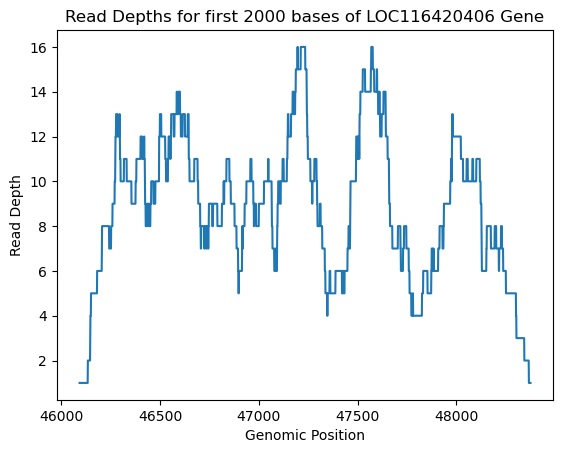

In [32]:
# GRADED CELL 3.5 (5 marks, max 1 min run-time)

# Use this cell to make your plot.
%matplotlib inline

import matplotlib.pyplot as plt

gene_start = 46227
gene_end = gene_start + 2000

positions = []
read_depths = []


for pileupcolumn in aln.pileup('s_harrisii_sample', gene_start, gene_end): 
    
    positions.append(pileupcolumn.pos)
    read_depths.append(pileupcolumn.n)

plt.plot(positions, read_depths)
plt.xlabel('Genomic Position')
plt.ylabel('Read Depth')
plt.title('Read Depths for first 2000 bases of LOC116420406 Gene')

# Show plot
plt.show()

## Part 4: Variant calling

### Setup

Consider the read alignment stored in **comp90016_assignment_2_dnaA.bam** (with index file **comp90016_assignment_2_dnaA.bam.bai**). Reads have been aligned to the reference sequence **comp90016_assignment_2_dnaA_ref.fasta** (with index file **comp90016_assignment_2_dnaA_ref.fasta.fai**).

We are interested in finding single nucleotide variants (SNVs) where the sequence of the reads is different to the reference sequence.

<div class="info">
<h3> Question 4.1 </h3>

(15 marks)

Implement an SNV caller for haploid organisms as a Python function.

Your function should only call SNVs where there are at least 5 reads aligned to that position, and at least 80% of the aligned bases are a specific non-reference allele.

Your function should only call (and output) SNVs (not indels, CNVs or larger variants).

- Assume ref is the filename of a FASTA file containing a single, linear contig.
- Assume ref_idx is the filename of an index file for ref with the extension .fai.
- Assume alignment is the filename of a BAM file containing reads aligned to the reference sequence ref.
- Assume alignment_idx is the filename of an index file for alignment with the extension .bai.

You are not required to use all input files in your function.

Return a Pandas dataframe following this VCF-like specification.
- Include one row for every SNV called.
- Include the following labelled columns: CHROM POS REF ALT QUAL INFO
- Set CHROM to the filename of ref (string).
- Set POS to the 1-based position of the variant relative to the reference sequence (integer).
- Set REF to the reference allele (string).
- Set ALT to the non-reference allele (string).
- Set QUAL to the average mapping quality of the non-reference allele (floating-point number).
- Set INFO to the allele frequency of the non-reference allele (floating-point number). This is defined as the fraction of the aligned bases that are the ALT allele.

If no SNVs are called, return an empty Pandas dataframe.


</div>

In [33]:
# GRADED CELL 4.1 (15 marks, max 1 min run-time)
import pandas as pd 

def call_SNVs(ref, ref_idx, alignment, alignment_idx):
    """
    An SNV caller for haploid organisms.
    Only call SNVs where there are at least 5 reads aligned to that position, and at least 80% of the aligned bases are a specific non-reference allele.
    Only call (and output) SNVs (not indels or larger variants).
    Assume ref is the filename of a FASTA file containing a single, linear contig.
    Assume ref_idx is the filename of an index file for ref with the extension .fai.
    Assume alignment is the filename of a BAM file containing reads aligned to the reference sequence ref.
    Assume alignment_idx is the filename of an index file for alignment with the extension .bai.
    Return a Pandas dataframe following this VCF-like specification.
        - Include one row for every SNV called.
        - Include the following labelled columns: CHROM POS REF ALT QUAL INFO
        - Set CHROM to the filename of ref (string).
        - Set POS to the 1-based position of the variant relative to the reference sequence (integer).
        - Set REF to the reference allele (string).
        - Set ALT to the non-reference allele (string).
        - Set QUAL to the average mapping quality of the non-reference allele (floating-point number).
        - Set INFO to the allele frequency of the non-reference allele (floating-point number). This is defined as the fraction of the aligned bases that are the ATL allele.
    If no SNVs are called, return an empty Pandas dataframe.
    """
   
    ref_file = pysam.FastaFile(ref)
    bam_file = pysam.AlignmentFile(alignment)

    rows = []

    
    for pileupcolumn in bam_file.pileup(): # iterating over the reference sequence
        if pileupcolumn.n < 5: # Only considering positions with at least 5 reads aligned
            continue

      
        ref_base = ref_file.fetch(pileupcolumn.reference_name, pileupcolumn.pos, pileupcolumn.pos + 1)
        
        
        
        base_counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0} # number of each base at this position
        mapq_sum = {'A': 0, 'C': 0, 'G': 0, 'T': 0} # quality of each base at this position
        for pileupread in pileupcolumn.pileups:
            if not pileupread.is_del and not pileupread.is_refskip:
                base = pileupread.alignment.query_sequence[pileupread.query_position]
                base_counts[base] += 1
                mapq_sum[base] += pileupread.alignment.mapping_quality
        
        
        non_ref_alleles = {k: v for k, v in base_counts.items() if k != ref_base}
        max_non_ref_allele = max(non_ref_alleles, key=non_ref_alleles.get) # non-reference allele with the highest count

        # Check if at least 80% of the aligned bases are the non-reference allele
        if non_ref_alleles[max_non_ref_allele] / sum(base_counts.values()) >= 0.8:
            # Add a row to the list
            rows.append({
                'CHROM': ref,
                'POS': pileupcolumn.pos + 1,
                'REF': ref_base,
                'ALT': max_non_ref_allele,
                'QUAL': mapq_sum[max_non_ref_allele] / non_ref_alleles[max_non_ref_allele],
                'INFO': non_ref_alleles[max_non_ref_allele] / sum(base_counts.values())
            })

    # Create a dataframe from the list of rows
    df = pd.DataFrame(rows, columns=['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'INFO'])

    return df

In [34]:
# ~~ Test your function in this cell ~~

print(call_SNVs('data/comp90016_assignment_2_dnaA_ref.fasta', 'data/comp90016_assignment_2_dnaA_ref.fasta.fai', 'data/comp90016_assignment_2_dnaA.bam', 'data/comp90016_assignment_2_dnaA.bam.bai')) 

# Output should be a pandas dataframe that looks like this:
"""
                                        CHROM  POS REF ALT  QUAL  INFO
0  data/comp90016_assignment_2_dnaA_ref.fasta  141   G   A  60.0   1.0
"""

                                        CHROM  POS REF ALT  QUAL  INFO
0  data/comp90016_assignment_2_dnaA_ref.fasta  141   G   A  60.0   1.0


'\n                                        CHROM  POS REF ALT  QUAL  INFO\n0  data/comp90016_assignment_2_dnaA_ref.fasta  141   G   A  60.0   1.0\n'

In [35]:
# --- AUTOGRADING CELL DO NOT EDIT ----



In [36]:
# --- AUTOGRADING CELL DO NOT EDIT ----


In [37]:
# --- AUTOGRADING CELL DO NOT EDIT ----


In [38]:
# --- AUTOGRADING CELL DO NOT EDIT ----


In [39]:
# --- AUTOGRADING CELL DO NOT EDIT ----


In [40]:
# --- AUTOGRADING CELL DO NOT EDIT ----


# END OF ASSIGNMENT

## Submitting

Follow these steps to submit your assignment

1) Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

2) Make sure you have filled in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"

3) **Clear all output** (in the menubar, select Kernel$\rightarrow$Restart & Clear Output)

4) Your completed notebook file containing all your answers must be turned in via LMS in `.ipynb` format.

5) You must also submit a copy of this notebook in `html` format with the output cleared (see step 4).


Your submission should include **only two** files with names formatted as: **Assignment_2.ipynb** and **Assignment_2.html**
